In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Design autoencoder and decoder
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

from tensorflow.keras.datasets import mnist
import numpy as np

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [ ]:
# Let's also create a separate encoder model:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [ ]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
# Insert model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()
# We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 10ms/step - loss: 0.2770 - val_loss: 0.1900
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1714 - val_loss: 0.1544
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1456 - val_loss: 0.1343
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1286 - val_loss: 0.1210
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1178 - val_loss: 0.1127
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1107 - val_loss: 0.1067
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1056 - val_loss: 0.1023
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1018 - val_loss: 0.0991
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0991 - val_loss: 0.0968
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0973 - val_loss: 0.0

In [ ]:
# After 50 epochs, the autoencoder seems to reach a stable train/test loss value of about 0.09.
# We can try to visualize the reconstructed inputs and the encoded representations. We will use Matplotlib.
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

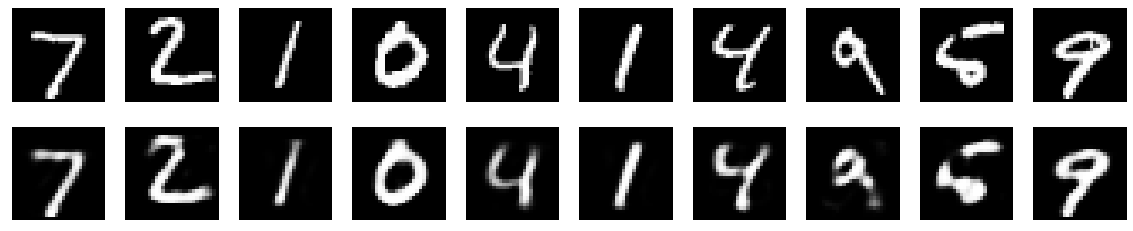

In [ ]:
# use Matplotlib
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# deeper model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
#decoder_layer = autoencoder.layers[-1]
#decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2449 - val_loss: 0.1642
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1495 - val_loss: 0.1362
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1300 - val_loss: 0.1219
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1197 - val_loss: 0.1149
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1141 - val_loss: 0.1109
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1104 - val_loss: 0.1076
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1072 - val_loss: 0.1045
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1048 - val_loss: 0.1032
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1029 - val_loss: 0.1008
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1014 - val_loss: 0.0998

In [ ]:
import pandas as pd

# Regression example
def get_data():
    #get train data
    train_data_path ='/content/gdrive/MyDrive/train.csv'
    train = pd.read_csv(train_data_path)

    #get test data
    test_data_path ='/content/gdrive/MyDrive/test.csv'
    test = pd.read_csv(test_data_path)

    return train , test

def get_combined_data():
  #reading train data
    train , test = get_data()
    target = train.SalePrice
    train.drop(['SalePrice'],axis = 1 , inplace = True)
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'Id'], inplace=True, axis=1)
    return combined, target

#Load train and test data into pandas DataFrames
train_data, test_data = get_data()

#Combine train and test data to process them together
combined, target = get_combined_data()

In [ ]:
combined.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [ ]:
# Drop missing values
def get_cols_with_no_nans(df,col_type):
    '''
    Arguments :
    df : The dataframe to process
    col_type :
          num : to only get numerical columns with no nans
          no_num : to only get nun-numerical columns with no nans
          all : to get any columns with no nans
    '''
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

# Call the function
num_cols = get_cols_with_no_nans(combined , 'num')
cat_cols = get_cols_with_no_nans(combined , 'no_num')

In [ ]:
# How many columns we got
print ('Number of numerical columns with no nan values :',len(num_cols))
print ('Number of nun-numerical columns with no nan values :',len(cat_cols))

Number of numerical columns with no nan values : 25
Number of nun-numerical columns with no nan values : 20


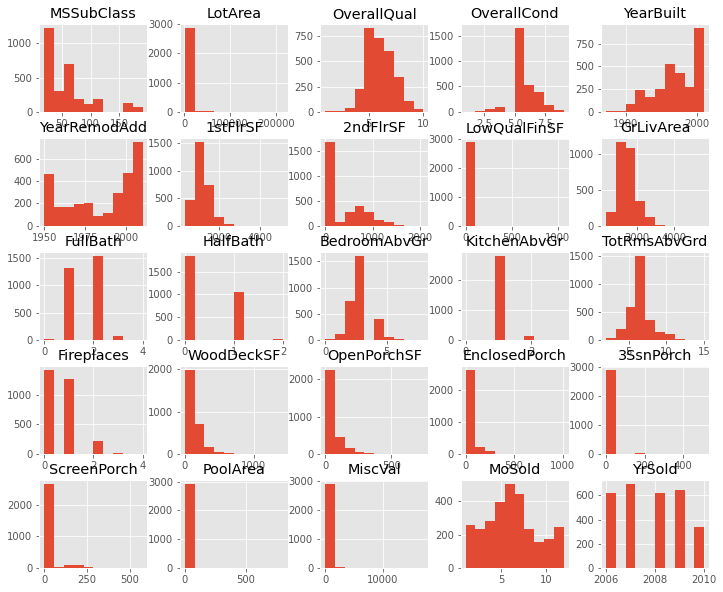

In [ ]:
import matplotlib.pyplot as plt
# Plot the variables
combined = combined[num_cols + cat_cols]
combined.hist(figsize = (12,10))
plt.show()

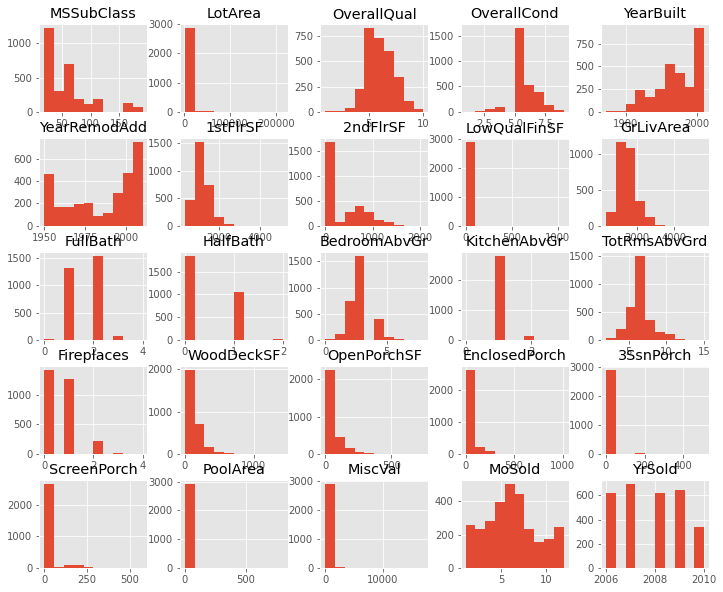

In [ ]:
import matplotlib.pyplot as plt
# Plot the variables
combined = combined[num_cols + cat_cols]
combined.hist(figsize = (12,10))
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


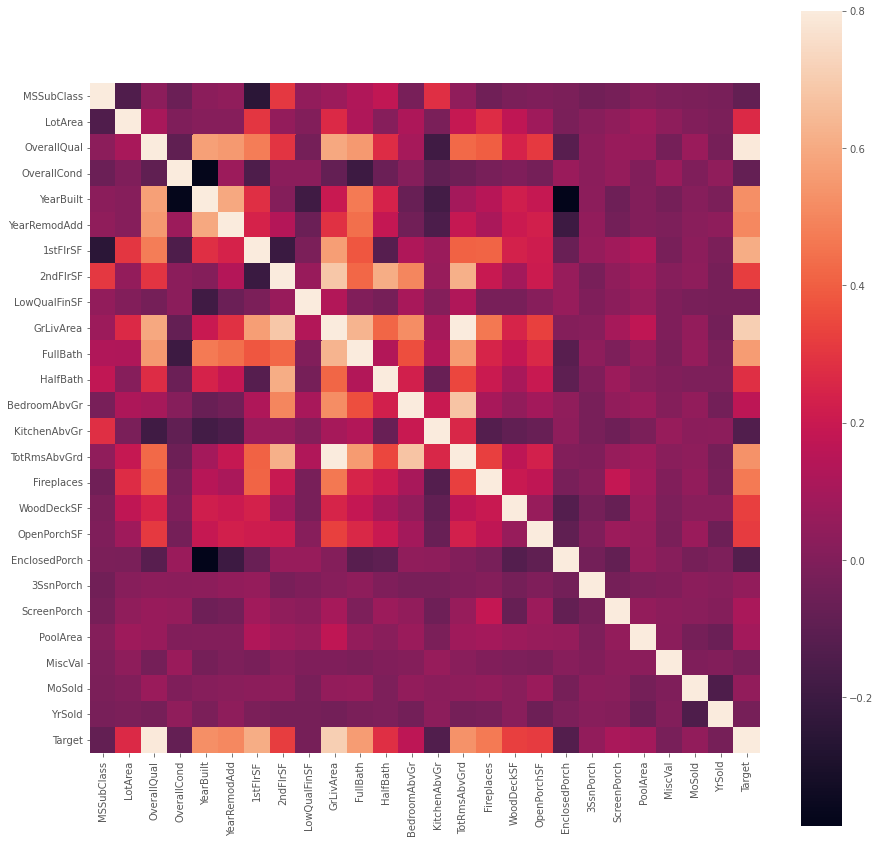

In [ ]:
import seaborn as sb
# How many of features are correlated
train_data = train_data[num_cols + cat_cols]
train_data['Target'] = target

C_mat = train_data.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()
# Looks like 15 correlated features

In [ ]:
import numpy as np
# We will encode the categorical features using one hot encoding.
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df


print('There were {} columns before encoding categorical features'.format(combined.shape[1]))
combined = oneHotEncode(combined, cat_cols)
print('There are {} columns after encoding categorical features'.format(combined.shape[1]))

There were 45 columns before encoding categorical features
There are 149 columns after encoding categorical features


In [ ]:
# Split data to train and test
def split_combined():
    global combined
    train = combined[:1460]
    test = combined[1460:]

    return train , test

train, test = split_combined()

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Sequential

# Use ‘relu’ as the activation function for the hidden layers
# Use a ‘normal’ initializer as the kernal_intializer

#Define the output layer with only one node
#Use ‘linear ’as the activation function for the output layer
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               19200     
                                                                 
 dense_37 (Dense)            (None, 256)               33024     
                                                                 
 dense_38 (Dense)            (None, 256)               65792     
                                                                 
 dense_39 (Dense)            (None, 256)               65792     
                                                                 
 dense_40 (Dense)            (None, 1)                 257       
                                                                 
Total params: 184,065
Trainable params: 184,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Define a checkpoint to save the data
checkpoint_name = 'Models/Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [ ]:
# Train the model
hist = NN_model.fit(train, target, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/500
30/37 [=======================>......] - ETA: 0s - loss: 146250.5781 - mean_absolute_error: 146250.5781
Epoch 1: val_loss improved from inf to 54768.04297, saving model to Models/Weights-001--54768.04297.hdf5
37/37 [==============================] - 1s 12ms/step - loss: 132288.3594 - mean_absolute_error: 132288.3594 - val_loss: 54768.0430 - val_mean_absolute_error: 54768.0430
Epoch 2/500
29/37 [======================>.......] - ETA: 0s - loss: 52292.2852 - mean_absolute_error: 52292.2852
Epoch 2: val_loss improved from 54768.04297 to 48780.32812, saving model to Models/Weights-002--48780.32812.hdf5
37/37 [==============================] - 0s 7ms/step - loss: 51800.4961 - mean_absolute_error: 51800.4961 - val_loss: 48780.3281 - val_mean_absolute_error: 48780.3281
Epoch 3/500
24/37 [==================>...........] - ETA: 0s - loss: 46568.7461 - mean_absolute_error: 46568.7461
Epoch 3: val_loss improved from 48780.32812 to 43859.09375, saving model to Models/Weights-003--43859

In [ ]:
# Load wights file of the best model :
 # choose the best checkpoint- YOURS IS DIFFERENT THAN THIS NUMBER
wights_file = 'Models/Weights-377--21097.70898.hdf5'
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
# Make predictions
predictions = NN_model.predict(test)

In [ ]:
predictions


array([[117913.23],
       [151097.55],
       [173251.23],
       ...,
       [157255.19],
       [140027.97],
       [213729.98]], dtype=float32)

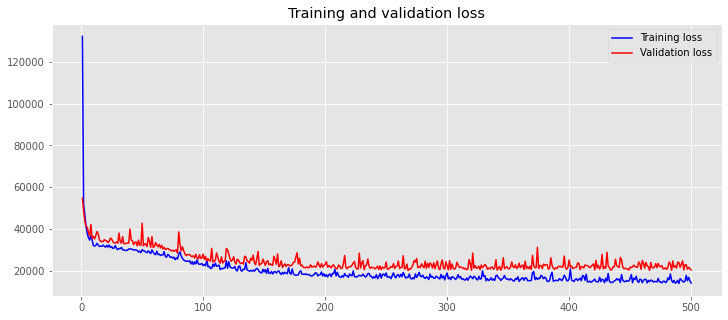

In [ ]:
#plt.style.use('ggplot')

def plot_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(loss) + 1)

    plt.figure(figsize=(12, 5))
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()


plot_history(hist)

In [ ]:
import tensorflow
early_stop = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 30)
callbacks_list= ModelCheckpoint('Models/Weights-{epoch:03d}--{val_loss:.5f}.hdf5', monitor='val_loss', save_best_only = True)
callbacks = [early_stop, callbacks_list]

In [ ]:
hist = NN_model.fit(train, target, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks)

Epoch 1/500
37/37 [==============================] - 1s 12ms/step - loss: 17566.7070 - mean_absolute_error: 17566.7070 - val_loss: 21996.0547 - val_mean_absolute_error: 21996.0547
Epoch 2/500
37/37 [==============================] - 0s 6ms/step - loss: 15769.7812 - mean_absolute_error: 15769.7812 - val_loss: 21576.0078 - val_mean_absolute_error: 21576.0078
Epoch 3/500
37/37 [==============================] - 0s 6ms/step - loss: 15827.8789 - mean_absolute_error: 15827.8789 - val_loss: 21383.7539 - val_mean_absolute_error: 21383.7539
Epoch 4/500
37/37 [==============================] - 0s 6ms/step - loss: 18470.7285 - mean_absolute_error: 18470.7285 - val_loss: 22628.8477 - val_mean_absolute_error: 22628.8477
Epoch 5/500
37/37 [==============================] - 0s 6ms/step - loss: 15535.7998 - mean_absolute_error: 15535.7998 - val_loss: 21148.7598 - val_mean_absolute_error: 21148.7598
Epoch 6/500
37/37 [==============================] - 0s 5ms/step - loss: 15384.8936 - mean_absolute_erro

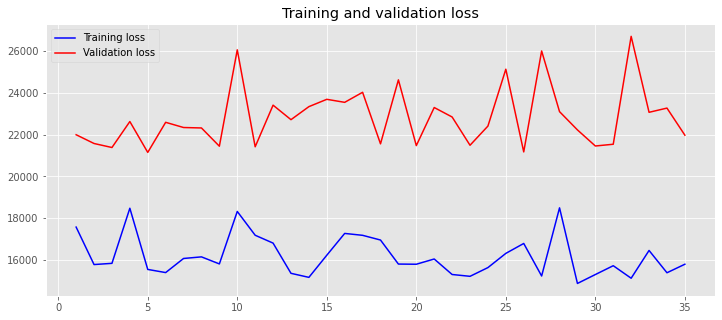

In [ ]:
plot_history(hist)


In [ ]:
# Assignment 7 solution
# Make predictions
predictions2 = NN_model.predict(train)

After adding Patience, the number of epochs reduced ]
Changing the patience from 30 to 20

What is patience: When we train the model, the loss is at first high and after a certain interval i.e epochs  loss reduces gradually. There comes a point where the loss doesnt reduce. in that case, we are training on more epochs even though the model training is almost complete.  
Patience tell the train after how many epochs it should conclude training as it wont see any more train loss. So even if you have set epochs, patience helps the model to interrupt after a certain number of epochs and helps time and gpu power contraints.

In [ ]:
import tensorflow
early_stop = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 20)
callbacks_list= ModelCheckpoint('Models/Weights-{epoch:03d}--{val_loss:.5f}.hdf5', monitor='val_loss', save_best_only = True)
callbacks = [early_stop, callbacks_list]

In [ ]:
hist1 = NN_model.fit(train, target, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks)

Epoch 1/500
37/37 [==============================] - 1s 17ms/step - loss: 15949.5791 - mean_absolute_error: 15949.5791 - val_loss: 25181.7715 - val_mean_absolute_error: 25181.7715
Epoch 2/500
37/37 [==============================] - 0s 12ms/step - loss: 17865.8086 - mean_absolute_error: 17865.8086 - val_loss: 21396.3691 - val_mean_absolute_error: 21396.3691
Epoch 3/500
37/37 [==============================] - 0s 11ms/step - loss: 15673.0938 - mean_absolute_error: 15673.0938 - val_loss: 23734.6094 - val_mean_absolute_error: 23734.6094
Epoch 4/500
37/37 [==============================] - 0s 11ms/step - loss: 15325.4336 - mean_absolute_error: 15325.4336 - val_loss: 22622.9883 - val_mean_absolute_error: 22622.9883
Epoch 5/500
37/37 [==============================] - 0s 12ms/step - loss: 15154.4775 - mean_absolute_error: 15154.4775 - val_loss: 20819.5918 - val_mean_absolute_error: 20819.5918
Epoch 6/500
37/37 [==============================] - 0s 9ms/step - loss: 15396.4141 - mean_absolute_

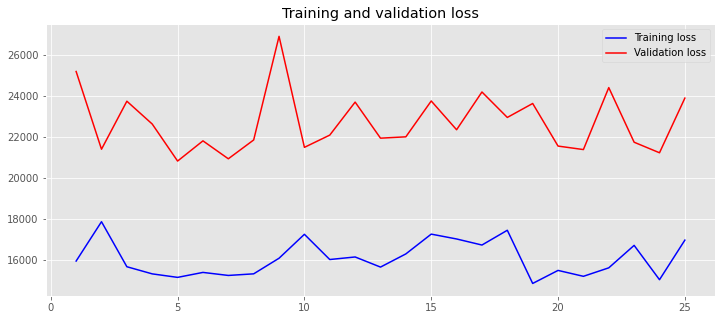

In [ ]:
plot_history(hist1)


When we changed the Patience.. The number of Epochs reduced from 82 (patiennce = 30) to 43(patience = 20.

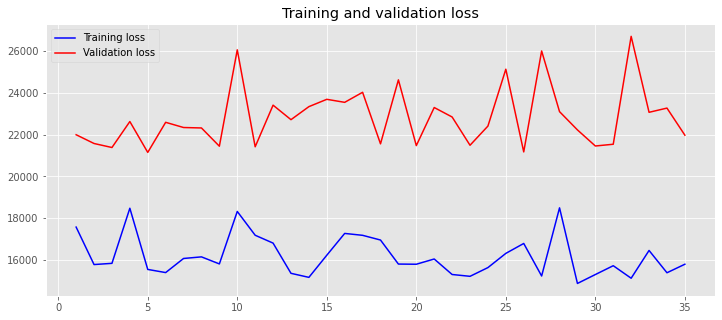

In [ ]:
plt.style.use('ggplot')
def plot_history(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  x = range(1, len(loss) + 1)
  plt.figure(figsize=(12, 5))
  plt.plot(x, loss, 'b', label='Training loss')
  plt.plot(x, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()
plot_history(hist)

We trained a regression model but we did not analyze the
performance of the model. Suggest a method to see the performance
of the model. Note that since we are not dealing with categorical
data, we cannot report the accuracy.



Here I am using Root mean squared error to measure the accuracy.

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(target, predictions2)
print (rmse)

892360423.0734109
